The direct colab link to this notebook is [here](https://colab.research.google.com/github/D3Mlab/ppandas/blob/master/examples/pJoin.ipynb).

The datasets used can be found [here](https://github.com/D3Mlab/ppandas/tree/master/tests/testing).

#Install pre-requisites and ppandas

In [1]:
# %pip install geopandas==0.12 # required for geovoronoi

In [ ]:
import sys
import os

sys.path.append(os.path.abspath('../ppandas'))
from p_frame import PDataFrame

import pandas as pd

#Create test pDataFrames

PDataFrame takes in 2 arguments: list of independent variables and data in the form of pandas dataFrame

In [3]:
df1 = pd.read_csv("../tests/data/ab.csv")
df2 = pd.read_csv("../tests/data/bc.csv")
df3 = pd.read_csv("../tests/data/bc-1.csv")
df4 = pd.read_csv("../tests/data/ab-1.csv")
df5 = pd.read_csv("../tests/data/a-1.csv")

pd1 = PDataFrame(["A"],df1)
pd2 = PDataFrame(["B"],df2)
pd3 = PDataFrame(["B"],df3)
pd4 = PDataFrame(["A"],df4)
pd5 = PDataFrame(["A"],df5)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'A': 'C', 'B': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'B': 'C', 'C': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'B': 'C', 'C': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'A': 'C', 'B': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'A': 'C'}


Visualise function can help users to see their models

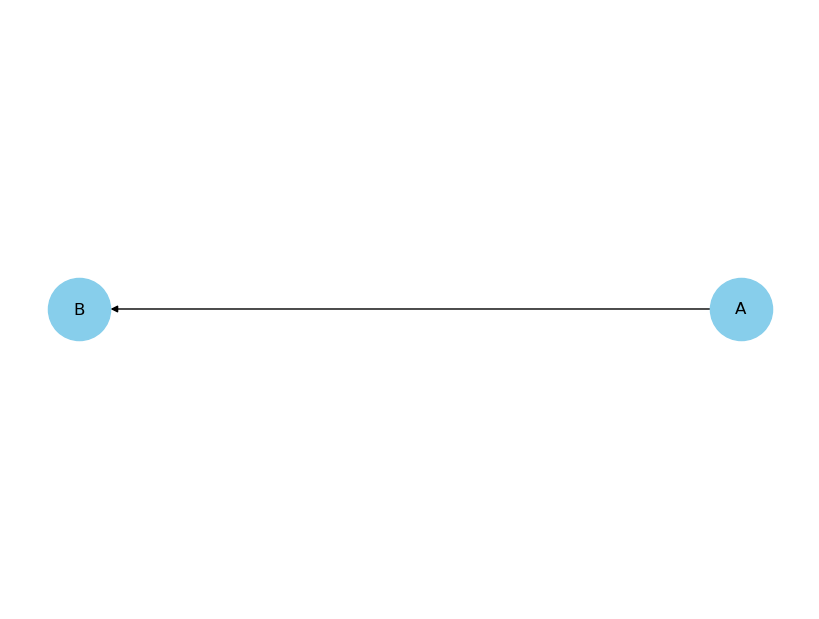

=== CPDs ===
+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+---------------------+---------------------+
| A    | A(0)                | A(1)                |
+------+---------------------+---------------------+
| B(0) | 0.30952380952380953 | 0.6904761904761905  |
+------+---------------------+---------------------+
| B(1) | 0.6904761904761905  | 0.30952380952380953 |
+------+---------------------+---------------------+


In [4]:
pd1.visualise(show_tables=True)

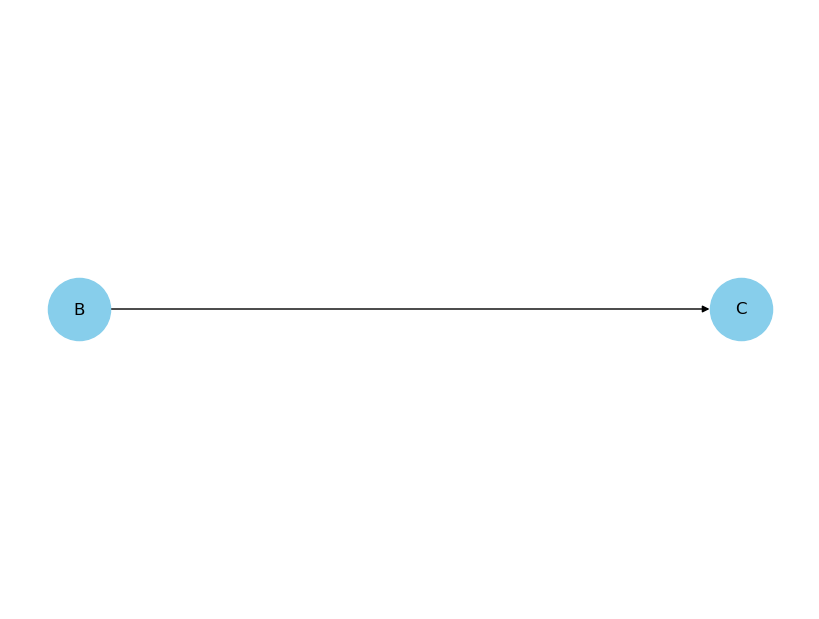

=== CPDs ===
+------+--------------------+------+
| B    | B(0)               | B(1) |
+------+--------------------+------+
| C(0) | 0.4024390243902439 | 0.5  |
+------+--------------------+------+
| C(1) | 0.5975609756097561 | 0.5  |
+------+--------------------+------+
+------+-----+
| B(0) | 0.5 |
+------+-----+
| B(1) | 0.5 |
+------+-----+


In [5]:
pd2.visualise(show_tables=True)

# Using PJoin

Use reference_pdataframe.pjoin(secondary_pdataframe) to join two pDataFrames

## Use pd1 as reference data pDataFrame

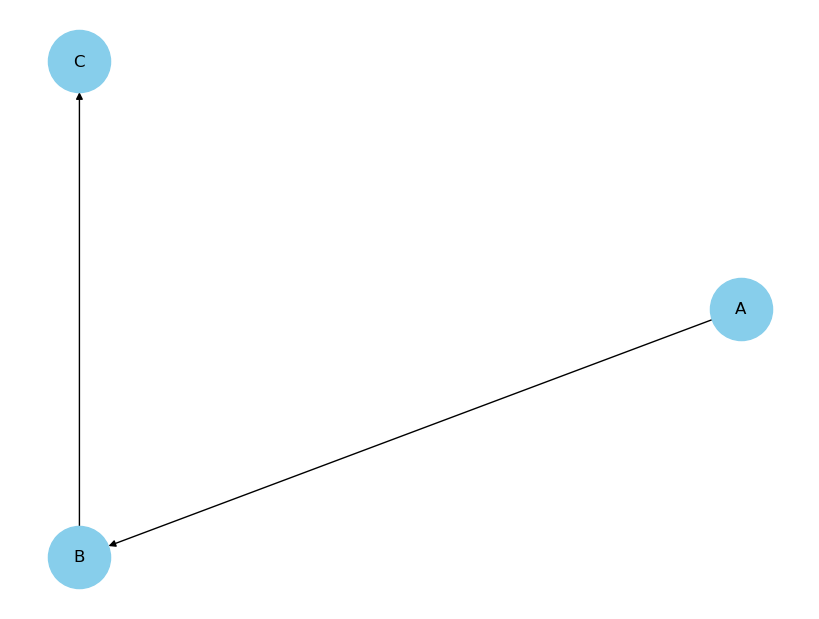

=== CPDs ===
+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+--------------------+------+
| B    | B(0)               | B(1) |
+------+--------------------+------+
| C(0) | 0.4024390243902439 | 0.5  |
+------+--------------------+------+
| C(1) | 0.5975609756097561 | 0.5  |
+------+--------------------+------+
+------+---------------------+---------------------+
| A    | A(0)                | A(1)                |
+------+---------------------+---------------------+
| B(0) | 0.30952380952380953 | 0.6904761904761905  |
+------+---------------------+---------------------+
| B(1) | 0.6904761904761905  | 0.30952380952380953 |
+------+---------------------+---------------------+


In [6]:
#pd1.join(pd2) should be ok

pd_join1 = pd1.pjoin(pd2)
pd_join1.visualise(show_tables=True)

In [7]:
pd_join1.num_of_records

300

pd2.join(pd1) is illegal because pd2 cannot be used as reference in this case

In [8]:
try:
	pd_join2 = pd2.pjoin(pd1)
except ValueError as e:
	print(e)

This join can not be performed since independent                             variable(s): 'B' in reference distribution are                             dependent in the second distribution. Please                             consider dropping these new dependencies or                             switching reference distribution.


Joining 2 pDataFrame with the same structure :

the child conditional probability is a weighted average of the original two Bayesian Networks.

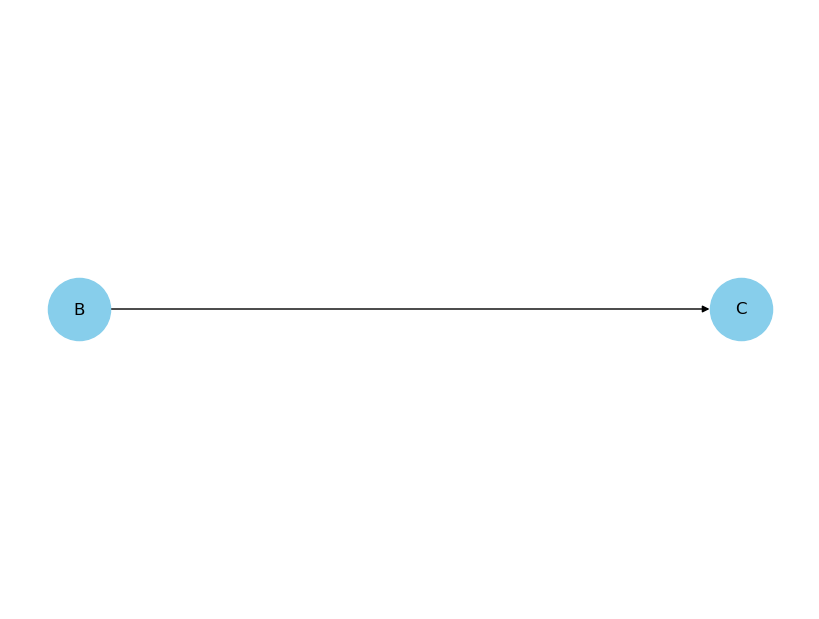

=== CPDs ===
+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| C(0) | 0.5  | 0.5  |
+------+------+------+
| C(1) | 0.5  | 0.5  |
+------+------+------+
+------+----------+
| B(0) | 0.214286 |
+------+----------+
| B(1) | 0.785714 |
+------+----------+


In [9]:
pd3.visualise(show_tables=True)

In [10]:
pd3.num_of_records

100

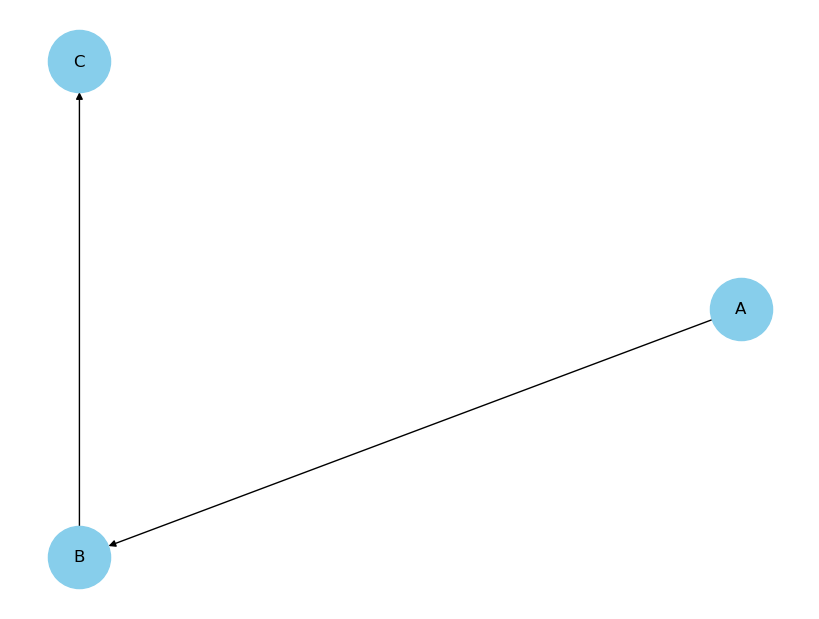

=== CPDs ===
+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+-------------------+------+
| B    | B(0)              | B(1) |
+------+-------------------+------+
| C(0) | 0.426829268292683 | 0.5  |
+------+-------------------+------+
| C(1) | 0.573170731707317 | 0.5  |
+------+-------------------+------+
+------+---------------------+---------------------+
| A    | A(0)                | A(1)                |
+------+---------------------+---------------------+
| B(0) | 0.30952380952380953 | 0.6904761904761905  |
+------+---------------------+---------------------+
| B(1) | 0.6904761904761905  | 0.30952380952380953 |
+------+---------------------+---------------------+


In [11]:
pd_join3 = pd_join1.pjoin(pd3)
pd_join3.visualise(show_tables=True)

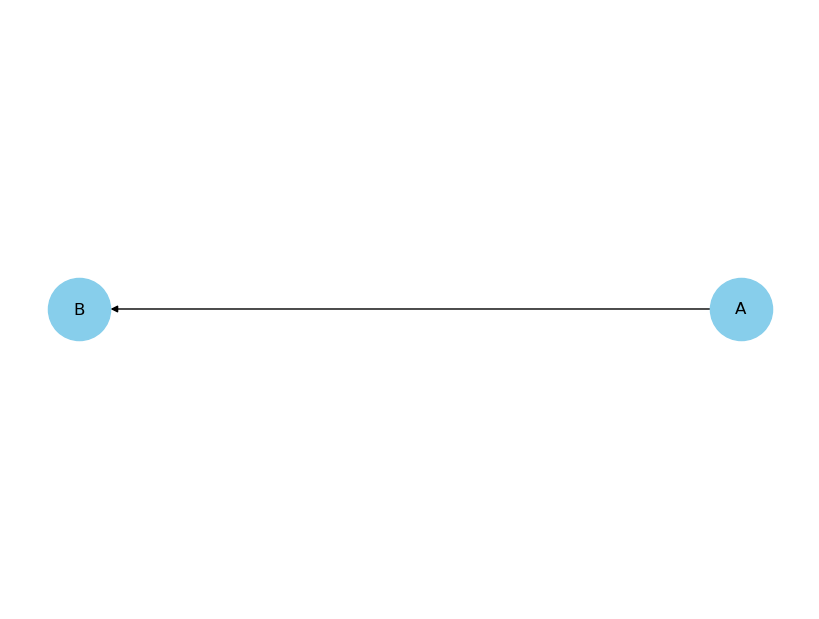

=== CPDs ===
+------+----------+
| A(0) | 0.214286 |
+------+----------+
| A(1) | 0.785714 |
+------+----------+
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| B(0) | 0.5  | 0.5  |
+------+------+------+
| B(1) | 0.5  | 0.5  |
+------+------+------+


In [12]:
pd4.visualise(show_tables=True)

In [13]:
pd4.num_of_records

100

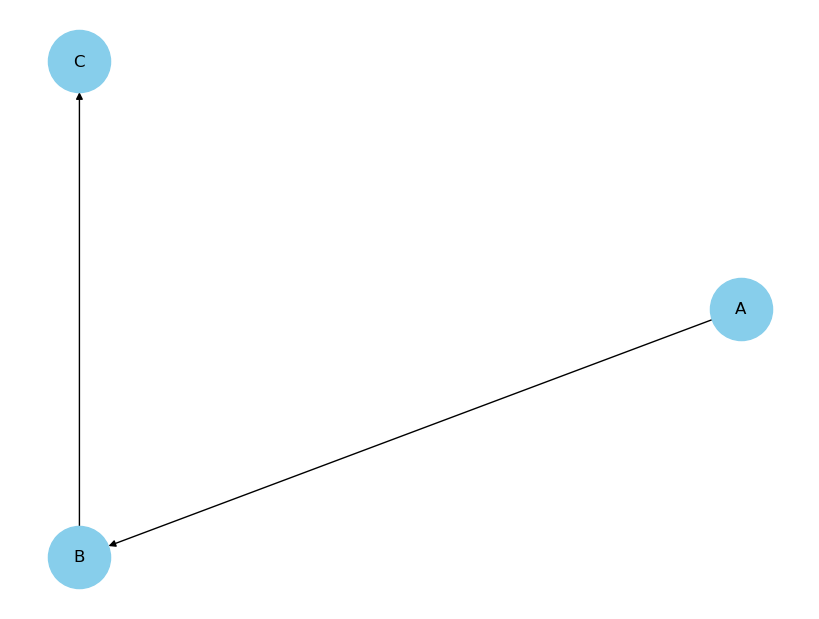

=== CPDs ===
+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+--------------------+------+
| B    | B(0)               | B(1) |
+------+--------------------+------+
| C(0) | 0.4024390243902439 | 0.5  |
+------+--------------------+------+
| C(1) | 0.5975609756097561 | 0.5  |
+------+--------------------+------+
+------+---------------------+---------------------+
| A    | A(0)                | A(1)                |
+------+---------------------+---------------------+
| B(0) | 0.35714285714285715 | 0.6428571428571428  |
+------+---------------------+---------------------+
| B(1) | 0.6428571428571428  | 0.35714285714285715 |
+------+---------------------+---------------------+


In [14]:
pd_join4 = pd_join1.pjoin(pd4)
pd_join4.visualise(show_tables=True)

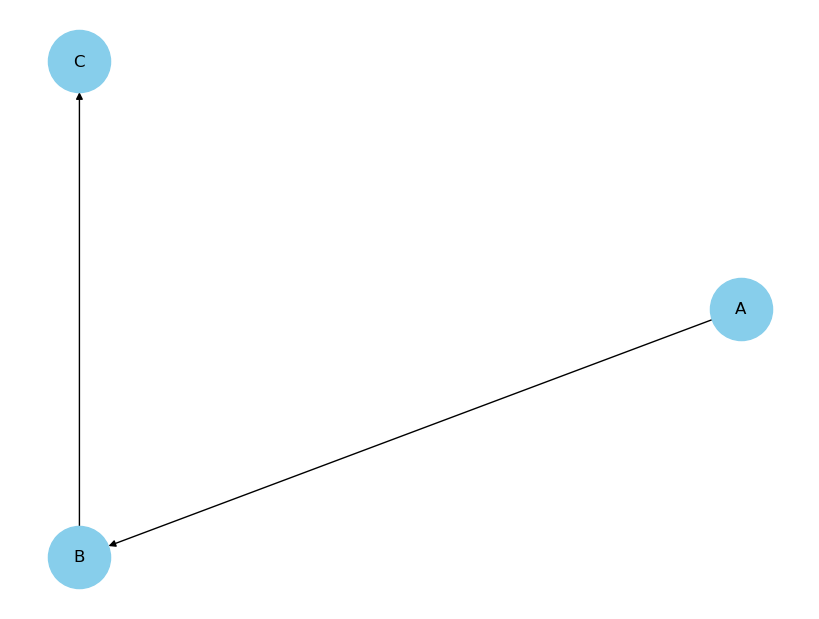

=== CPDs ===
+------+----------+
| A(0) | 0.214286 |
+------+----------+
| A(1) | 0.785714 |
+------+----------+
+------+--------------------+------+
| B    | B(0)               | B(1) |
+------+--------------------+------+
| C(0) | 0.4024390243902439 | 0.5  |
+------+--------------------+------+
| C(1) | 0.5975609756097561 | 0.5  |
+------+--------------------+------+
+------+---------------------+---------------------+
| A    | A(0)                | A(1)                |
+------+---------------------+---------------------+
| B(0) | 0.35714285714285715 | 0.6428571428571428  |
+------+---------------------+---------------------+
| B(1) | 0.6428571428571428  | 0.35714285714285715 |
+------+---------------------+---------------------+


In [15]:
pd_join5 = pd4.pjoin(pd_join1)
pd_join5.visualise(show_tables = True)

# Query

Query function takes in a list of the interested variables and an optional argument of array of evidences

In [16]:
res = pd_join5.query(['A'])
print (res)

   A  Probability(A)
0  0        0.214286
1  1        0.785714


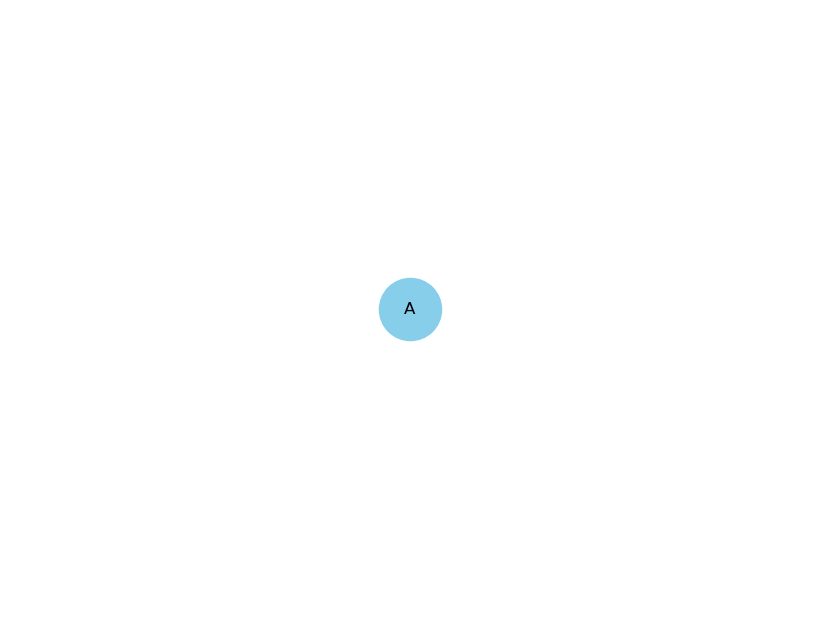

=== CPDs ===
+------+-----+
| A(0) | 0.2 |
+------+-----+
| A(1) | 0.8 |
+------+-----+


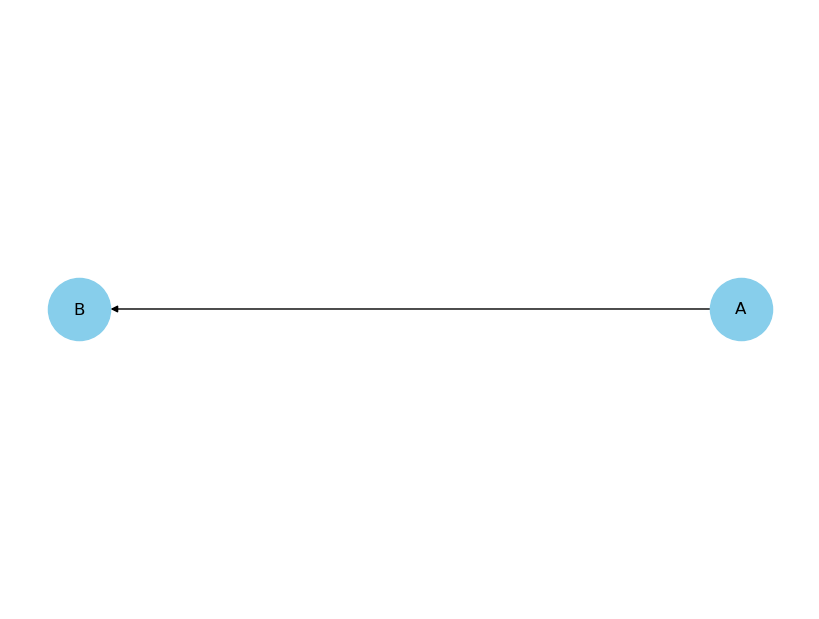

=== CPDs ===
+------+-----+
| A(0) | 0.2 |
+------+-----+
| A(1) | 0.8 |
+------+-----+
+------+---------------------+---------------------+
| A    | A(0)                | A(1)                |
+------+---------------------+---------------------+
| B(0) | 0.30952380952380953 | 0.6904761904761905  |
+------+---------------------+---------------------+
| B(1) | 0.6904761904761905  | 0.30952380952380953 |
+------+---------------------+---------------------+
   B  Probability(B)
0  0        0.309524
1  1        0.690476
200


In [17]:
#Replace the marginal distribution of an independent variable node
pd5.visualise(show_tables=True)
pd_join_6 = pd5.pjoin(pd1)
pd_join_6.visualise(show_tables=True)
queryResult = pd_join_6.query(["B"],evidence_vars={"A":'0'})
print(queryResult)
print(pd_join_6.num_of_records)